# Sample Lya posterior as a function of nuisance parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import cProfile
import emcee
import corner
# our own modules
import simplest_emulator
import linear_emulator
import gp_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import pressure_model
import lya_theory
import likelihood
import emcee_sampler

### Setup Lya likelihood function

In [2]:
# read P1D measurement
data=data_PD2013.P1D_PD2013(blind_data=True,zmin=2.1,zmax=4.7)
zs=data.z

In [3]:
basedir='../../p1d_emulator/sim_suites/emulator_512_18062019/'
#basedir='../../p1d_emulator/sim_suites/emulator_512_17052019/'
p1d_label=None
skewers_label=None
undersample_z=1
paramList=["Delta2_p","mF","sigT_Mpc","gamma","kF_Mpc"]
max_arxiv_size=2000
kmax_Mpc=3.0
emu_type='polyfit'
if emu_type=='polyfit':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,emu_type=emu_type,
                                kmax_Mpc=kmax_Mpc,verbose=False,paramList=paramList,train=True)
elif emu_type=='k_bin':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                               undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                               verbose=False,paramList=paramList,train=True,emu_type=emu_type)
elif emu_type=='linear':
    # specify parameters to emulate
    emulate_slope=False
    emulate_growth=False
    emulate_running=False
    emulate_pressure=True
    emu=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,kmax_Mpc=kmax_Mpc,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                emulate_slope=emulate_slope,emulate_running=emulate_running,
                                emulate_pressure=emulate_pressure,emulate_growth=emulate_growth,verbose=False)
elif emu_type=='NGP':
    emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                verbose=False)
else:
    raise ValueError('wrong emulator type '+emu_type)

latin hyper-cube data {'nsamples': 6, 'param_space': {'heat_slo': {'latex': '$H_S$', 'max_val': 0.5, 'min_val': -0.5, 'ip': 1}, 'heat_amp': {'latex': '$H_A$', 'max_val': 2.0, 'min_val': 0.5, 'ip': 0}, 'z_rei': {'latex': '$z_r$', 'max_val': 12.0, 'min_val': 6.0, 'ip': 2}}, 'samples': {'1': [1.875, 0.25, 8.5], '3': [1.375, -0.25, 6.5], '4': [0.625, 0.41666666666666663, 7.5], '5': [1.625, -0.4166666666666667, 11.5], '2': [0.875, 0.08333333333333326, 10.5], '0': [1.125, -0.08333333333333337, 9.5]}}
simulation suite has 6 samples
0 sample has sim params = [1.125, -0.08333333333333337, 9.5]
simulation has 20 redshifts
undersample_z = 1
../../p1d_emulator/sim_suites/emulator_512_18062019//sim_pair_0/sim_plus/p1d_0_Ns100_wM0.07.json snapshot does not have p1d
../../p1d_emulator/sim_suites/emulator_512_18062019//sim_pair_0/sim_plus/p1d_1_Ns100_wM0.07.json snapshot does not have p1d
../../p1d_emulator/sim_suites/emulator_512_18062019//sim_pair_0/sim_plus/p1d_2_Ns100_wM0.07.json snapshot does not

In [4]:
# specify free parameters in likelihood
#free_parameters=['ln_kF_0']
#free_parameters=['ln_tau_0','ln_tau_1']
free_parameters=['ln_tau_0','ln_tau_1','ln_T0_0','ln_gamma_0','ln_kF_0']
#free_parameters=['ln_tau_0','ln_T0_0','ln_gamma_0']

In [5]:
sampler = emcee_sampler.EmceeSampler(emulator=emu,free_parameters=free_parameters,verbose=True)

use default likelihood
Note: redshifts have been re-sorted (earliest first)
setup with 50 walkers
set 50 walkers with 5 dimensions
done setting up sampler


In [6]:
for p in sampler.like.free_params:
    print(p.name,p.value,p.min_value,p.max_value)

ln_tau_0 -0.7945801724139945 -1.5 -0.5
ln_tau_1 3.18 2.5 3.8
ln_T0_0 9.392661928770137 8.294049640102028 10.308952660644293
ln_gamma_0 0.3364722366212129 0.09531017980432493 0.6931471805599453
ln_kF_0 -1.7719568419318752 -2.995732273553991 -0.6931471805599453


### Run burn-in chains

In [7]:
sampler.like.go_silent()

In [8]:
sampler.run_burn_in(nsteps=200)

start burn-in, will do 200 steps
0 [0.4847607  0.55127174 0.48686291 0.52579085 0.4645828 ]
20 [0.47178276 0.58549462 0.57751794 0.47977277 0.4724141 ]
40 [0.46518198 0.57320513 0.62733468 0.37914755 0.45884716]
60 [0.47933217 0.51119051 0.63080525 0.33918948 0.45436606]
80 [0.49185917 0.45064449 0.63697229 0.31152157 0.45330706]
100 [0.50350891 0.39611227 0.63891926 0.30352632 0.45359489]
120 [0.49990617 0.3981525  0.64123062 0.30324341 0.45384045]
140 [0.50192538 0.39319179 0.63943748 0.30444261 0.45354196]
160 [0.50000528 0.39590404 0.6383078  0.30191089 0.45393525]
180 [0.50725724 0.37499951 0.63882674 0.30100496 0.45346551]
finished burn-in


### Run main chains

In [9]:
sampler.run_chains(nsteps=500)

0 [0.50125732 0.37347428 0.64011029 0.29677661 0.45469654]
20 [0.49852707 0.37805005 0.63852952 0.29293785 0.45545266]
40 [0.49592051 0.38447767 0.63982707 0.29319137 0.45532065]
60 [0.49649526 0.3787082  0.64004721 0.28966167 0.45561383]
80 [0.49702193 0.36630067 0.64109828 0.28512103 0.45589842]
100 [0.49580645 0.36320787 0.64219218 0.28380883 0.4559821 ]
120 [0.49194857 0.38375778 0.64064388 0.28413882 0.45655231]
140 [0.48761111 0.39997021 0.63921137 0.28523213 0.45674626]
160 [0.4837927  0.40882807 0.64048957 0.28190689 0.45660455]
180 [0.4860882  0.40130145 0.63860131 0.28062755 0.45643787]
200 [0.48776828 0.39519957 0.64009667 0.27939225 0.45660925]
220 [0.48976396 0.38474863 0.64167722 0.27517264 0.4562034 ]
240 [0.49021854 0.38605962 0.64077956 0.27557664 0.45630188]
260 [0.48898458 0.38628257 0.64152225 0.27563359 0.45648281]
280 [0.48410796 0.40517174 0.64161568 0.27613766 0.45661013]
300 [0.48780129 0.39152889 0.64061774 0.27258532 0.45689393]
320 [0.48798797 0.39013641 0.6

In [10]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.sampler.acceptance_fraction)))

Mean acceptance fraction: 0.399


### Plot results in cube units (0 < x < 1)

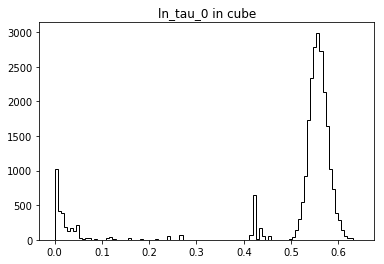

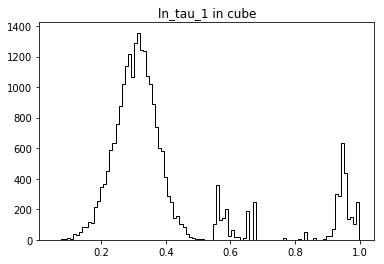

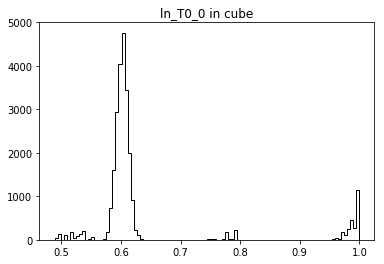

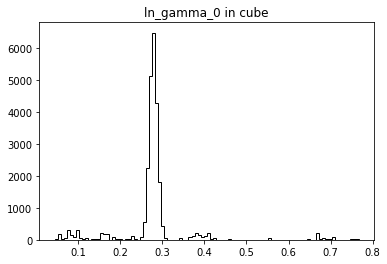

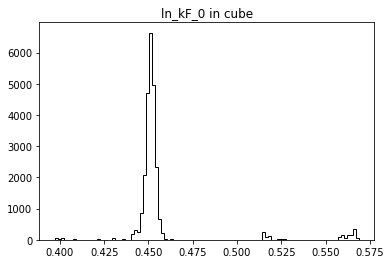

In [11]:
sampler.plot_histograms(cube=True)

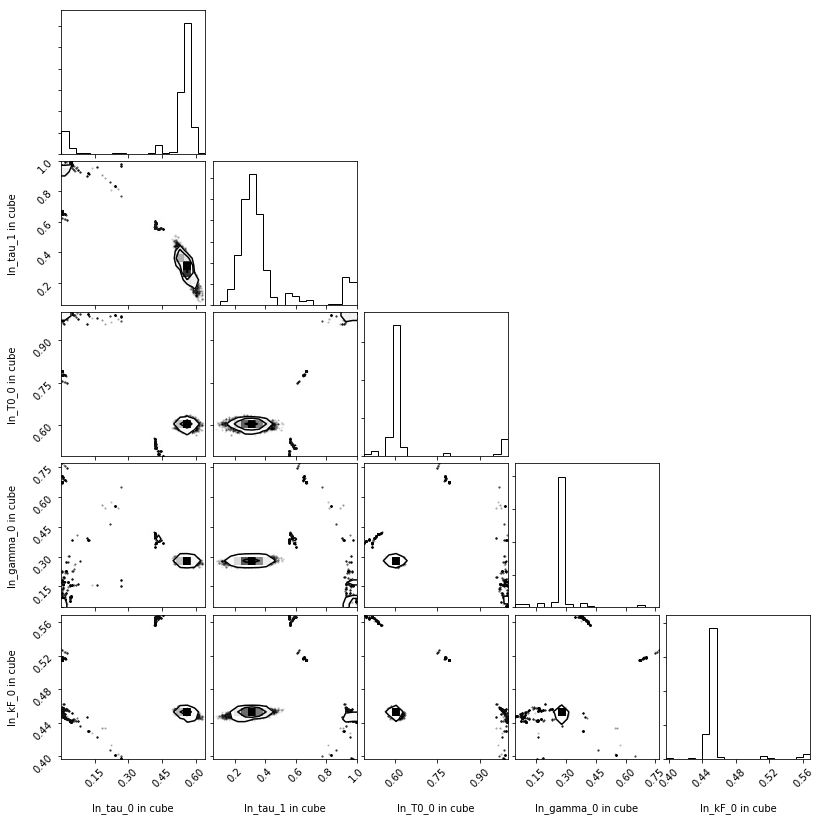

In [12]:
sampler.plot_corner(cube=True)

### Plot results for dimensional parameters

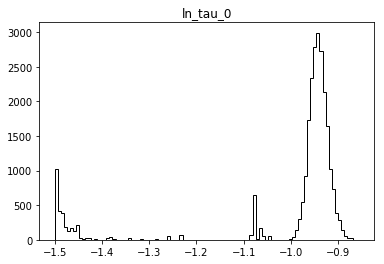

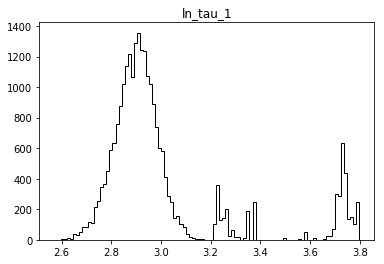

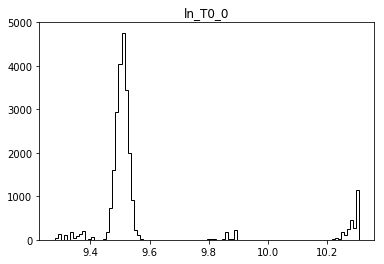

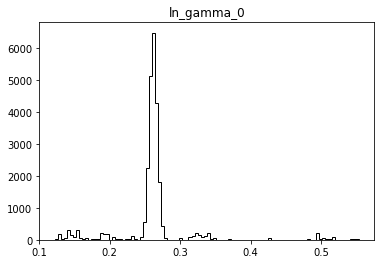

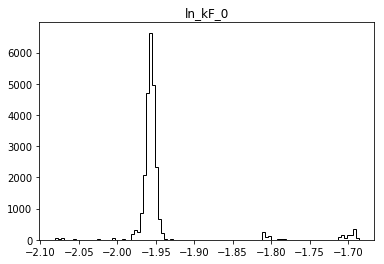

In [13]:
sampler.plot_histograms(cube=False)

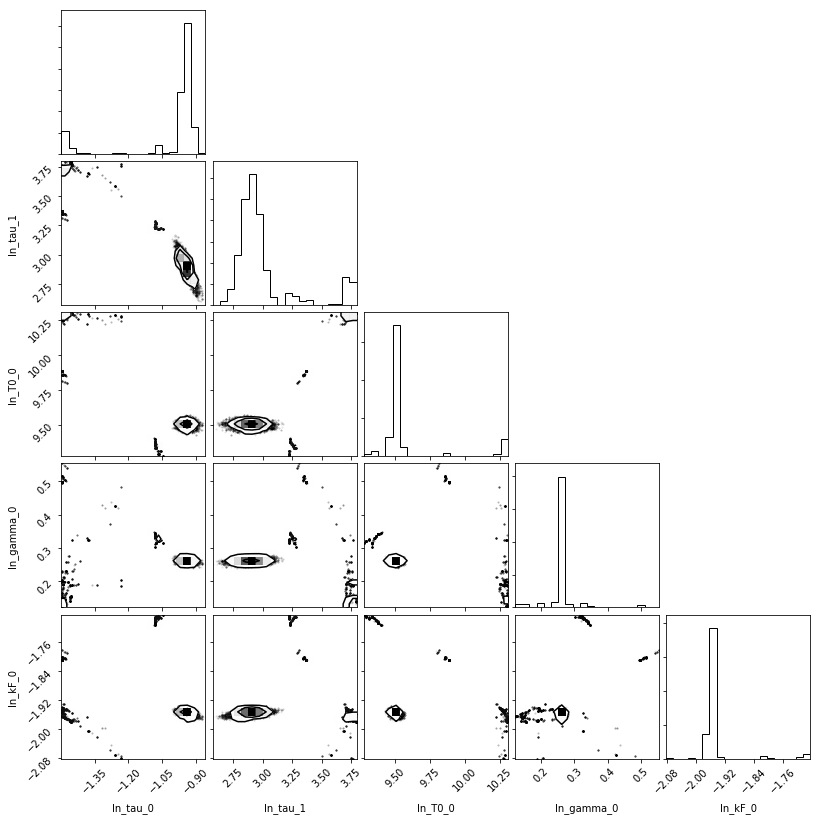

In [14]:
sampler.plot_corner(cube=False)

### Use likelihood object to make other useful plots

In [15]:
# get best fit model
ind = np.unravel_index(np.argmax(sampler.sampler.lnprobability, axis=None), sampler.sampler.lnprobability.shape)
best_fit=sampler.sampler.chain[ind]

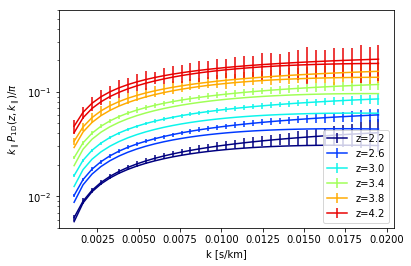

In [16]:
sampler.like.plot_p1d(values=best_fit,plot_every_iz=2)

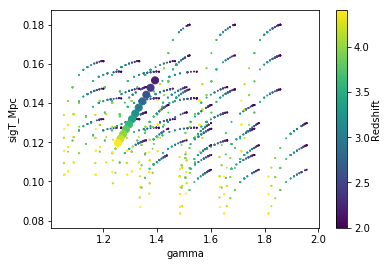

In [17]:
sampler.like.overplot_emulator_calls('gamma','sigT_Mpc',values=best_fit)

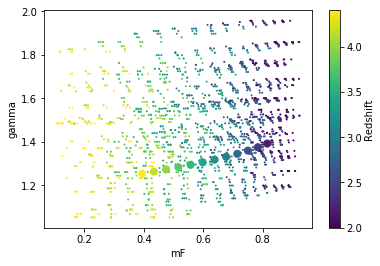

In [18]:
sampler.like.overplot_emulator_calls('mF','gamma',values=best_fit)

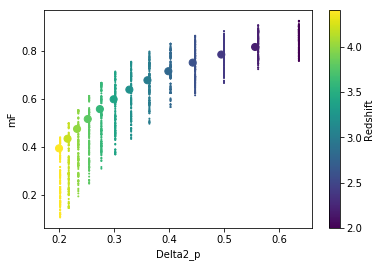

In [19]:
sampler.like.overplot_emulator_calls('Delta2_p','mF',values=best_fit)

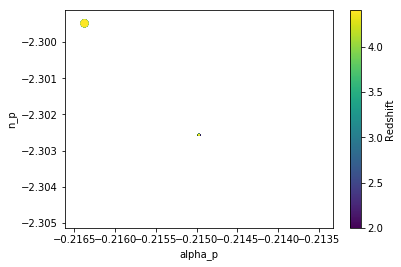

In [20]:
sampler.like.overplot_emulator_calls('alpha_p','n_p',values=best_fit)

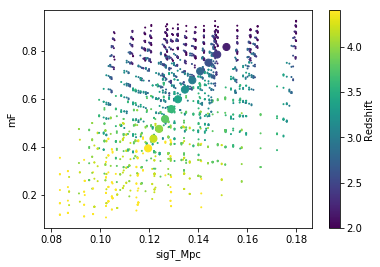

In [21]:
sampler.like.overplot_emulator_calls('sigT_Mpc','mF',values=best_fit)

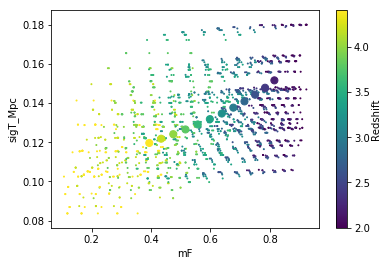

In [22]:
sampler.like.overplot_emulator_calls('mF','sigT_Mpc',values=best_fit)

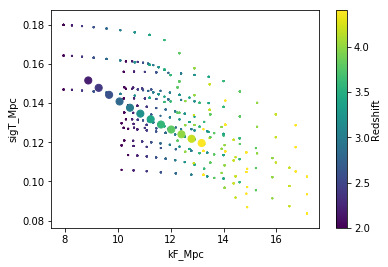

In [23]:
sampler.like.overplot_emulator_calls('kF_Mpc','sigT_Mpc',values=best_fit)

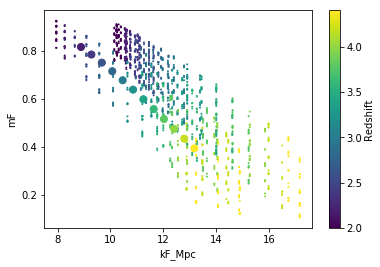

In [24]:
sampler.like.overplot_emulator_calls('kF_Mpc','mF',values=best_fit)

### Write chain to file for later use

In [25]:
chain_filename='test'
sampler.write_chain_to_file(chain_filename)

### Read pre-computed chain

In [26]:
new_sampler = emcee_sampler.EmceeSampler(emulator=emu,free_parameters=free_parameters,
                                         read_chain_file=chain_filename,verbose=True)

use default likelihood
Note: redshifts have been re-sorted (earliest first)
will read chain from file test
done setting up sampler


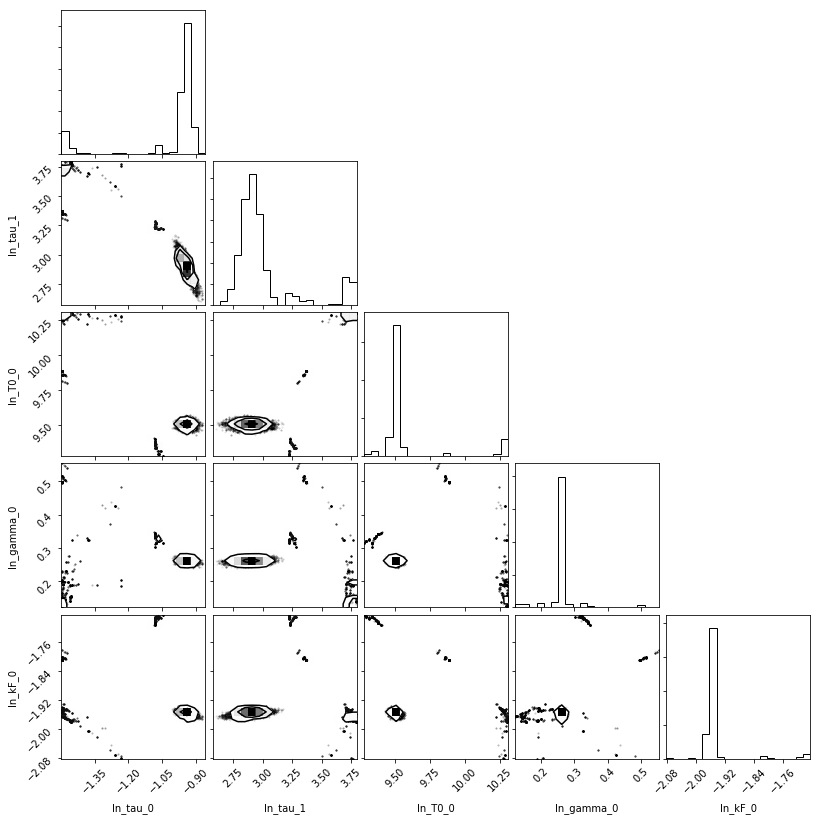

In [27]:
new_sampler.plot_corner(cube=False)

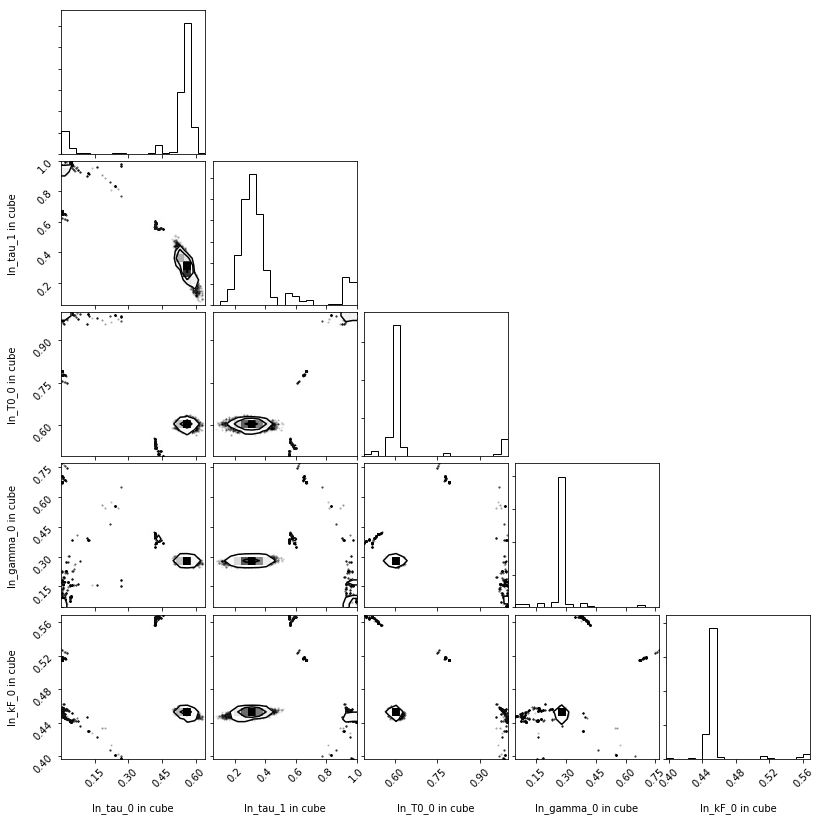

In [28]:
new_sampler.plot_corner(cube=True)

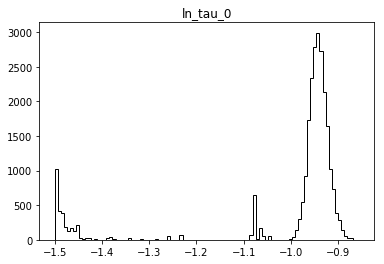

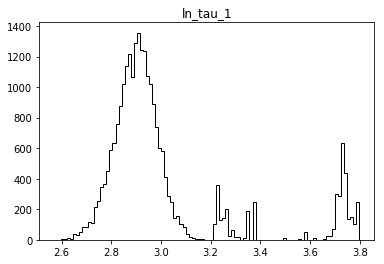

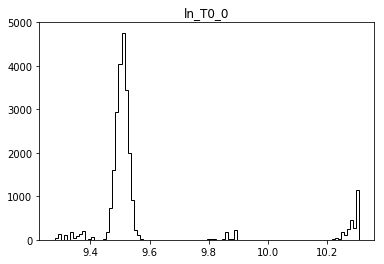

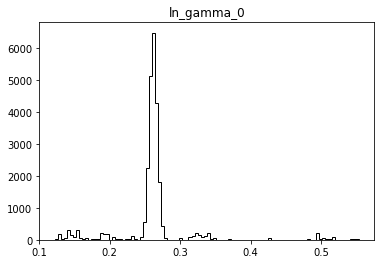

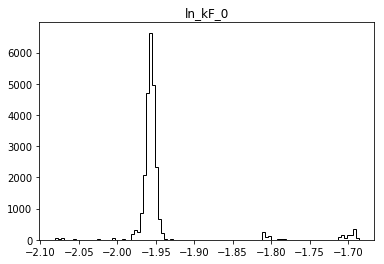

In [29]:
new_sampler.plot_histograms(cube=False)